In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Fake news dataset/WELFake_Dataset.csv')

In [ ]:
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [ ]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
df.title.iloc[0]

'LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO]'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
df.shape

(72134, 4)

In [ ]:
#Drop Nan values
df=df.dropna()

In [ ]:
#Get the independent features
x=df.drop('label',axis=1)

#Get the dependent features
y=df['label']

In [ ]:
x.shape

(71537, 3)

In [ ]:
y.shape

(71537,)

In [ ]:
#vocabulary size
voc_size=5000

# **Onehot Representation**

In [ ]:
messages=x.copy()

In [ ]:
messages.title.iloc[1]

'UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO]'

In [ ]:
messages.reset_index(inplace=True)

In [ ]:
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
###Dataset  Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0,len(messages)):
  print(i)
  review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
  review = review.lower()
  review = review.split()

  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)



Streaming output truncated to the last 5000 lines.
66537
66538
66539
66540
66541
66542
66543
66544
66545
66546
66547
66548
66549
66550
66551
66552
66553
66554
66555
66556
66557
66558
66559
66560
66561
66562
66563
66564
66565
66566
66567
66568
66569
66570
66571
66572
66573
66574
66575
66576
66577
66578
66579
66580
66581
66582
66583
66584
66585
66586
66587
66588
66589
66590
66591
66592
66593
66594
66595
66596
66597
66598
66599
66600
66601
66602
66603
66604
66605
66606
66607
66608
66609
66610
66611
66612
66613
66614
66615
66616
66617
66618
66619
66620
66621
66622
66623
66624
66625
66626
66627
66628
66629
66630
66631
66632
66633
66634
66635
66636
66637
66638
66639
66640
66641
66642
66643
66644
66645
66646
66647
66648
66649
66650
66651
66652
66653
66654
66655
66656
66657
66658
66659
66660
66661
66662
66663
66664
66665
66666
66667
66668
66669
66670
66671
66672
66673
66674
66675
66676
66677
66678
66679
66680
66681
66682
66683
66684
66685
66686
66687
66688
66689
66690
66691
66692
66693
66694
6

In [ ]:
corpus

['law enforc high alert follow threat cop white blacklivesmatt fyf terrorist video',
 'unbeliev obama attorney gener say charlott rioter peac protest home state north carolina video',
 'bobbi jindal rais hindu use stori christian convers woo evangel potenti bid',
 'satan russia unv imag terrifi new supernuk western world take notic',
 'time christian group sue amazon splc design hate group',
 'dr ben carson target ir never audit spoke nation prayer breakfast',
 'hous intel chair trump russia fake stori evid anyth video',
 'sport bar owner ban nfl game show true american sport like speak rural america video',
 'latest pipelin leak underscor danger dakota access pipelin',
 'gop senat smack punchabl alt right nazi internet',
 'may brexit offer would hurt cost eu citizen eu parliament',
 'schumer call trump appoint offici overse puerto rico relief',
 'watch hilari ad call question health age clinton crime famili boss',
 'chang expect espn polit agenda despit huge subscrib declin breitbart'

In [ ]:
voc_size=5000
onehot_repr=[one_hot(words,voc_size) for words in corpus]
onehot_repr

[[2869, 740, 333, 2850, 1090, 2196, 3722, 1976, 2986, 3109, 3422, 2698],
 [501,
  648,
  2605,
  1648,
  683,
  3593,
  4997,
  4811,
  4250,
  4780,
  4253,
  58,
  2175,
  2698],
 [1660, 4898, 3325, 3291, 3536, 2328, 505, 2356, 3238, 769, 2276, 957],
 [281, 1884, 4674, 1577, 3783, 2486, 3849, 591, 464, 2846, 1328],
 [326, 505, 2483, 570, 3454, 4880, 2483, 339, 2483],
 [3880, 981, 1266, 1042, 1816, 209, 284, 4888, 379, 2111, 764],
 [586, 2618, 3619, 4678, 1884, 4973, 2328, 1394, 594, 2698],
 [4724,
  1410,
  4127,
  3045,
  379,
  3298,
  3027,
  986,
  483,
  4724,
  729,
  2581,
  2452,
  1207,
  2698],
 [2266, 3828, 2046, 3610, 4491, 4104, 303, 3828],
 [1516, 2064, 3526, 2825, 1390, 2792, 1355, 1339],
 [3695, 3414, 1717, 3366, 3025, 2397, 169, 3918, 169, 574],
 [3359, 3855, 4678, 189, 2905, 198, 4004, 4418, 1172],
 [777, 1382, 951, 3855, 3904, 760, 4729, 1738, 3531, 3924, 3428],
 [3543, 2254, 2851, 2681, 1311, 2158, 3128, 3835, 3670, 4573],
 [3016, 2721, 3790, 394, 2504, 586, 4426]

# **Embedding Representation**

In [ ]:
sent_length = 20
embedded_docs = pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
embedded_docs

array([[   0,    0,    0, ..., 3109, 3422, 2698],
       [   0,    0,    0, ...,   58, 2175, 2698],
       [   0,    0,    0, ...,  769, 2276,  957],
       ...,
       [   0,    0,    0, ..., 2781, 2267, 4188],
       [   0,    0,    0, ...,  937, 3461, 4932],
       [   0,    0,    0, ..., 2231, 1738, 2749]], dtype=int32)

In [ ]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0, 2869,  740,  333,
       2850, 1090, 2196, 3722, 1976, 2986, 3109, 3422, 2698], dtype=int32)

In [ ]:
##Creating Model
voc_size=5000
embedding_vector_features=128
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.4))
model.add(LSTM(32))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 128)           640000    
                                                                 
 dropout (Dropout)           (None, 20, 128)           0         
                                                                 
 lstm (LSTM)                 (None, 32)                20608     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 660641 (2.52 MB)
Trainable params: 660641 (2.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
len(embedded_docs),y.shape

(71537, (71537,))

# **Training the model**

In [ ]:
x_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
x_final.shape,y_final.shape

((71537, 20), (71537,))

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_final,y_final,test_size=0.33,random_state=42)

In [ ]:
x_train.shape

(47929, 20)

In [ ]:
##Finally training
import time
start_time=time.time()

model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=12,batch_size=32)

Epoch 1/12
1498/1498 [==============================] - 24s 11ms/step - loss: 0.3284 - accuracy: 0.8565 - val_loss: 0.2607 - val_accuracy: 0.8898
Epoch 2/12
1498/1498 [==============================] - 12s 8ms/step - loss: 0.2474 - accuracy: 0.8980 - val_loss: 0.2535 - val_accuracy: 0.8933
Epoch 3/12
1498/1498 [==============================] - 12s 8ms/step - loss: 0.2307 - accuracy: 0.9057 - val_loss: 0.2440 - val_accuracy: 0.8978
Epoch 4/12
1498/1498 [==============================] - 12s 8ms/step - loss: 0.2155 - accuracy: 0.9132 - val_loss: 0.2401 - val_accuracy: 0.9000
Epoch 5/12
1498/1498 [==============================] - 11s 7ms/step - loss: 0.2029 - accuracy: 0.9190 - val_loss: 0.2365 - val_accuracy: 0.9022
Epoch 6/12
1498/1498 [==============================] - 10s 7ms/step - loss: 0.1917 - accuracy: 0.9252 - val_loss: 0.2405 - val_accuracy: 0.9026
Epoch 7/12
1498/1498 [==============================] - 11s 7ms/step - loss: 0.1824 - accuracy: 0.9298 - val_loss: 0.2363 - val_a

# **Monte-Carlo Dropout model using Functional API**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

input_layer = Input(shape=(20,))

# Create the rest of the layers identical to your original model
embedding_layer = Embedding(voc_size, embedding_vector_features, input_length=20)(input_layer)
dropout_layer_1 = Dropout(0.4)(embedding_layer)
lstm_layer = LSTM(32)(dropout_layer_1)
dropout_layer_2 = Dropout(0.3)(lstm_layer)
output_layer = Dense(1, activation='sigmoid')(dropout_layer_2)

# Create the prediction model
prediction_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the prediction model (you may need to specify the optimizer and loss)
prediction_model.compile(loss='binary_crossentropy', optimizer='rmsprop' ,  metrics=['accuracy'])

# Load the weights from the original model to the prediction model
prediction_model.set_weights(model.get_weights())

print(prediction_model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 20, 128)           640000    
                                                                 
 dropout_2 (Dropout)         (None, 20, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                20608     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 660641 (2.52 MB)
Trainable params: 660641 (2.52

In [ ]:
# Number of Monte Carlo samples

n_samples = 100

# Perform Monte Carlo Dropout sampling on x_test
predictions = []
for _ in range(n_samples):
    preds = prediction_model.predict(x_test)  # Activate dropout layers during prediction
    predictions.append(preds)

# Calculate uncertainty as the standard deviation of predictions
predictions = np.array(predictions)
avg_prediction = np.mean(predictions, axis=0)
uncertainty = np.std(predictions, axis=0)

end_time=time.time()

y_pred_classes=[]

# Iterate over each example in x_test and print results individually
for i in range(len(x_test)):
    example_avg_prediction = avg_prediction[i]
    example_uncertainty = uncertainty[i]

    if example_avg_prediction > 0.6:
        final_prediction = "Fake"
        y_pred_class=1
    else:
        final_prediction = "Real"
        y_pred_class=0

    y_pred_classes.append(y_pred_class)

    print(f"Example {i}:")
    print(f"Average Prediction: {example_avg_prediction}")
    print(f"Uncertainty: {example_uncertainty}")
    print(f"Final Prediction: {final_prediction}")
    print("-" * 40)

Streaming output truncated to the last 5000 lines.
Example 22608:
Average Prediction: [0.0001693]
Uncertainty: [1.7462298e-10]
Final Prediction: Real
----------------------------------------
Example 22609:
Average Prediction: [0.0013876]
Uncertainty: [4.656613e-10]
Final Prediction: Real
----------------------------------------
Example 22610:
Average Prediction: [0.00250576]
Uncertainty: [1.3969839e-09]
Final Prediction: Real
----------------------------------------
Example 22611:
Average Prediction: [0.60844135]
Uncertainty: [6.556511e-07]
Final Prediction: Fake
----------------------------------------
Example 22612:
Average Prediction: [0.9979929]
Uncertainty: [1.1920929e-06]
Final Prediction: Fake
----------------------------------------
Example 22613:
Average Prediction: [0.31630695]
Uncertainty: [2.3841858e-07]
Final Prediction: Real
----------------------------------------
Example 22614:
Average Prediction: [0.98819196]
Uncertainty: [6.556511e-07]
Final Prediction: Fake
---------

In [ ]:
execution_time=end_time-start_time
print(f"Execution time : {execution_time} seconds")

Execution time : 509.92827224731445 seconds


# **Confusion matrix,accuracy and classification report**

Confusion Matrix:
 [[10688  1005]
 [ 1344 10571]]
Accuracy: 0.9004998305659099
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90     11693
           1       0.91      0.89      0.90     11915

    accuracy                           0.90     23608
   macro avg       0.90      0.90      0.90     23608
weighted avg       0.90      0.90      0.90     23608



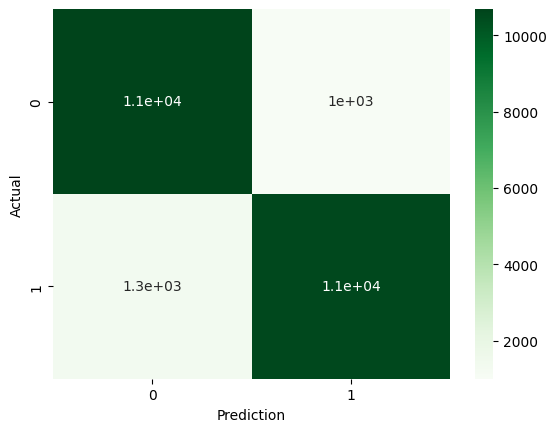

In [ ]:
#Confusion matrix, accuracy and classification report
confusion_mat = confusion_matrix(y_test,y_pred_classes)
accuracy = accuracy_score(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes)

print("Confusion Matrix:\n", confusion_mat)
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_mat,cmap="Greens",annot=True, xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()


In [ ]:
import tensorflow as tf
tf.__version__

'2.14.0'

In [ ]:
import pickle
filename='lstmmcd.pkl'
pickle.dump(model,open(filename,'wb'))

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate predicted probabilities from your model
y_prob = prediction_model.predict(x_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#HYPERPARAMETER OPTIMIZATION


In [ ]:
pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.7 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from kerastuner.tuners import BayesianOptimization
from kerastuner.oracles import BayesianOptimizationOracle
def build_model(hp):
    model = Sequential()

    # Add layers to your model based on the hyperparameters
    model.add(keras.layers.Embedding(input_dim=5000, output_dim=hp.Int('output_dim', min_value=32, max_value=128, step=32), input_length=20))
    model.add(Dropout(rate=hp.Float('dropout_rate_1', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('lstm_units', min_value=32, max_value=256, step=32)))
    model.add(Dropout(rate=hp.Float('dropout_rate_2', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))

    # Compile your model with hyperparameters
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop', 'adagrad', 'adamax','nadam']), loss='binary_crossentropy', metrics=['accuracy'])

    return model


class MyTuner(BayesianOptimization):
    def run_trial(self, trial, *args, **kwargs):
        kwargs['batch_size'] = trial.hyperparameters.Int('batch_size', 32, 256, step=32)
        kwargs['epochs'] = trial.hyperparameters.Int('epochs', 10, 30)
        # Run the trial and get metrics
        metrics = super(MyTuner, self).run_trial(trial, *args, **kwargs)
        # Return the metrics dictionary
        return metrics

# Define a custom callback if needed
from tensorflow import keras

class MyCustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Implement your custom callback logic here
        tf.keras.callbacks.EarlyStopping('val_loss', patience=5)
        pass

# Create an instance of your custom tuner
'''tuner = BayesianOptimization(
    hypermodel=build_model,  # Replace with your hypermodel function
    objective='val_accuracy',
    max_trials=30,
    num_initial_points=10,
    directory='my_dir',
    project_name='FNCL'
)'''

tuner = MyTuner(
    hypermodel=build_model,  # Your model-building function
    objective='val_accuracy',  # Your optimization objective
    max_trials=34,
    num_initial_points=15,  # You can include additional tuner-related settings here
)

# Define your custom callback (if needed)
custom_callback = MyCustomCallback()

# Search for the best hyperparameters
tuner.search(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    callbacks=[custom_callback]
)


Trial 33 Complete [00h 04m 24s]
val_accuracy: 0.8962216377258301

Best val_accuracy So Far: 0.9023635983467102
Total elapsed time: 01h 50m 52s

Search: Running Trial #34

Value             |Best Value So Far |Hyperparameter
32                |128               |output_dim
0.4               |0.4               |dropout_rate_1
256               |32                |lstm_units
0.2               |0.3               |dropout_rate_2
adamax            |rmsprop           |optimizer
32                |32                |batch_size
26                |12                |epochs

Epoch 1/26
1498/1498 [==============================] - 25s 15ms/step - loss: 0.3970 - accuracy: 0.8098 - val_loss: 0.2918 - val_accuracy: 0.8752
Epoch 2/26
1498/1498 [==============================] - 12s 8ms/step - loss: 0.2832 - accuracy: 0.8796 - val_loss: 0.2734 - val_accuracy: 0.8845
Epoch 3/26
1498/1498 [==============================] - 12s 8ms/step - loss: 0.2563 - accuracy: 0.8923 - val_loss: 0.2667 - val_accuracy: 

In [ ]:
# Print the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
print("Best Hyperparameters:")
print(best_hyperparameters.get_config())